In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import log_loss

In [35]:
train = pd.read_csv('Train.csv')
train.head()
test = pd.read_csv('Test.csv')


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    int64 
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

In [8]:
train.describe()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness
count,889.000000,889.000000,889.00000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,1.258718,0.120360,0.83802,0.086614,0.919010,0.055118,0.042745,0.082115,0.925759,0.017998,0.021372,0.032621
std,0.500557,0.325565,0.36864,0.281427,0.272973,0.228339,0.202395,0.274694,0.262310,0.133018,0.144704,0.177742
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
train.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

<Axes: xlabel='count', ylabel='UnderRisk'>

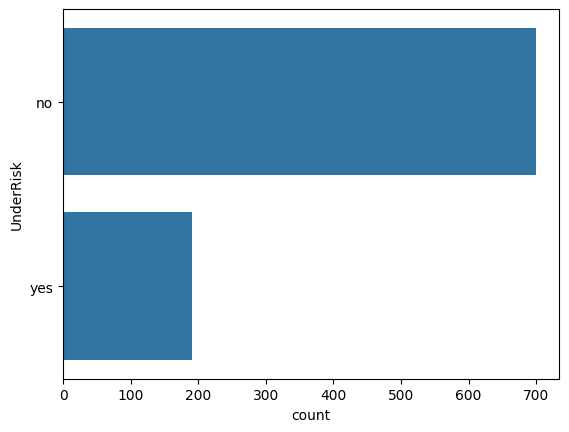

In [10]:
sns.countplot(train.UnderRisk)

In [11]:
for c in train.columns :
    print(train[c].value_counts())

Gender
1    607
2    256
0     26
Name: count, dtype: int64
Chain_smoker
0    782
1    107
Name: count, dtype: int64
Consumes_other_tobacco_products
1    745
0    144
Name: count, dtype: int64
HighBP
0    812
1     77
Name: count, dtype: int64
Obese
1    817
0     72
Name: count, dtype: int64
Diabetes
0    840
1     49
Name: count, dtype: int64
Metabolic_syndrome
0    851
1     38
Name: count, dtype: int64
Use_of_stimulant_drugs
0    816
1     73
Name: count, dtype: int64
Family_history
1    823
0     66
Name: count, dtype: int64
History_of_preeclampsia
0    873
1     16
Name: count, dtype: int64
CABG_history
0    870
1     19
Name: count, dtype: int64
Respiratory_illness
0    860
1     29
Name: count, dtype: int64
UnderRisk
no     699
yes    190
Name: count, dtype: int64


In [17]:
plt.figure(figsize=(20, 17))


<Figure size 2000x1700 with 0 Axes>

<Figure size 2000x1700 with 0 Axes>

<Axes: xlabel='Respiratory_illness', ylabel='Count'>

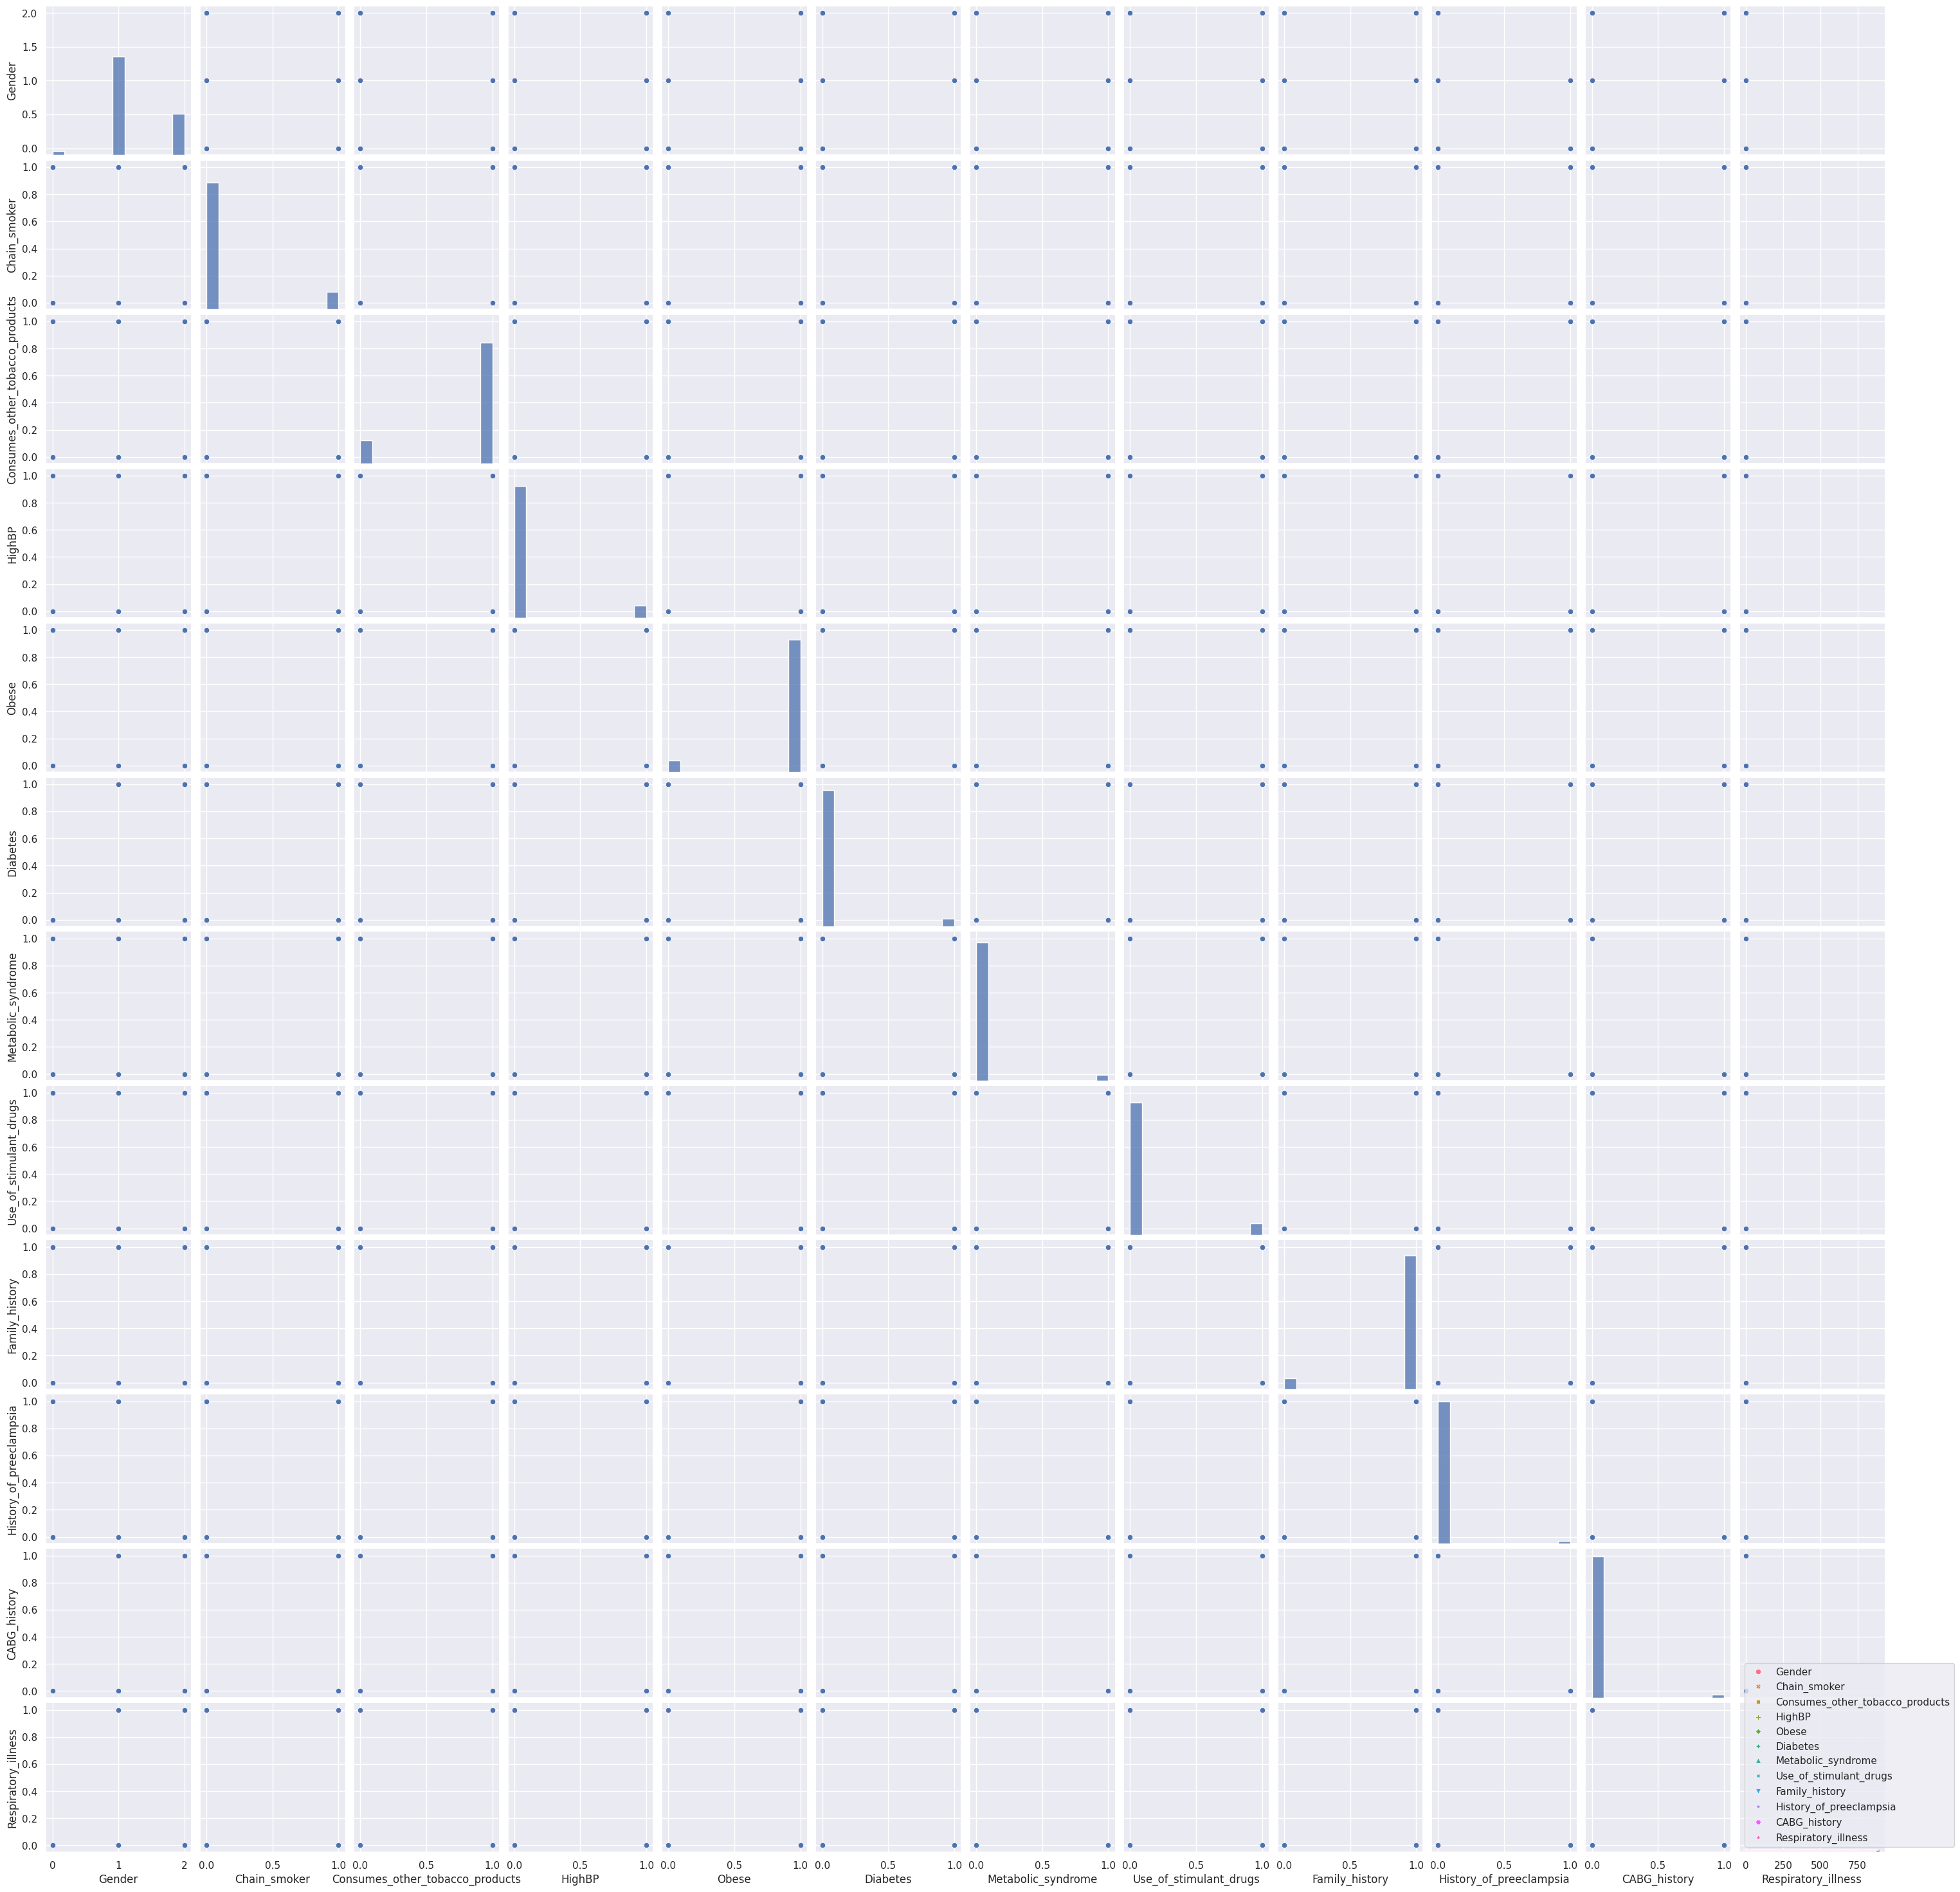

In [30]:
sns.pairplot(train)


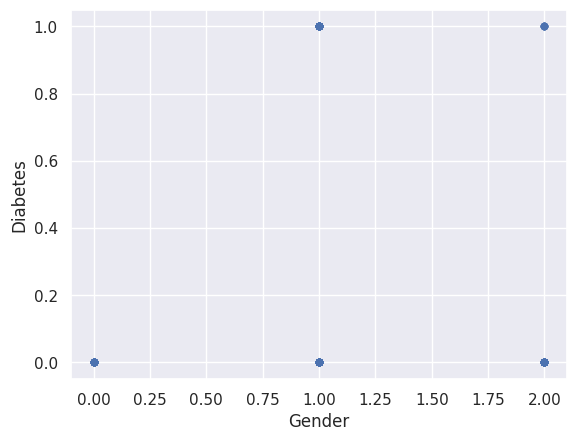

In [41]:
train.plot(x='Gender',y='Diabetes',kind = 'scatter')
plt.show()

In [20]:
X = train.iloc[:,:-1].values
y = train.iloc[:, 1].values
X[0]

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [21]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = Sequential([
    Dense(48, input_shape=(12,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(6, activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [22]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=classifier.fit(X_train, y_train,validation_data=(X_test, y_test), batch_size=100, epochs=20)

Epoch 1/20
8/8 [==============================] - 3s 94ms/step - loss: 0.6686 - accuracy: 0.7188 - val_loss: 0.6367 - val_accuracy: 0.8876
Epoch 2/20
8/8 [==============================] - 0s 12ms/step - loss: 0.6070 - accuracy: 0.8687 - val_loss: 0.5691 - val_accuracy: 0.8989
Epoch 3/20
8/8 [==============================] - 0s 13ms/step - loss: 0.5412 - accuracy: 0.8825 - val_loss: 0.4970 - val_accuracy: 0.8989
Epoch 4/20
8/8 [==============================] - 0s 15ms/step - loss: 0.4696 - accuracy: 0.8825 - val_loss: 0.4154 - val_accuracy: 0.8989
Epoch 5/20
8/8 [==============================] - 0s 11ms/step - loss: 0.3956 - accuracy: 0.8825 - val_loss: 0.3356 - val_accuracy: 0.8989
Epoch 6/20
8/8 [==============================] - 0s 12ms/step - loss: 0.3176 - accuracy: 0.8825 - val_loss: 0.2546 - val_accuracy: 0.8989
Epoch 7/20
8/8 [==============================] - 0s 13ms/step - loss: 0.2472 - accuracy: 0.8825 - val_loss: 0.1874 - val_accuracy: 0.9213
Epoch 8/20
8/8 [===========

In [23]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                624       
                                                                 
 dense_1 (Dense)             (None, 24)                1176      
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 6)                 78        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 2203 (8.61 KB)
Trainable params: 2203 (8.6

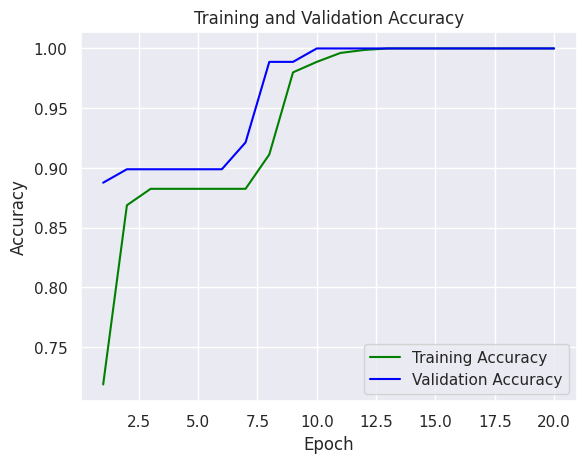

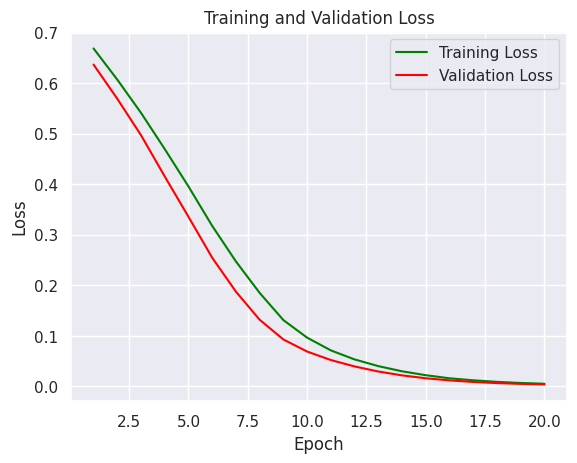

In [24]:
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
# Loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
y_pred = classifier.predict(X_test)
y_pred

3/3 [==============================] - 0s 15ms/step


array([[1.2241568e-03],
       [1.2241568e-03],
       [8.1270562e-05],
       [1.2241568e-03],
       [1.2241568e-03],
       [3.3890674e-04],
       [1.2241568e-03],
       [4.1356200e-04],
       [1.2241568e-03],
       [1.2241568e-03],
       [1.2241568e-03],
       [9.8069388e-01],
       [4.1356200e-04],
       [4.1356200e-04],
       [1.2241568e-03],
       [1.2241568e-03],
       [1.2241568e-03],
       [9.6493363e-01],
       [1.0227658e-03],
       [9.6493363e-01],
       [1.2241568e-03],
       [1.2241568e-03],
       [9.8069388e-01],
       [1.2241568e-03],
       [1.2241568e-03],
       [4.1356200e-04],
       [4.1356200e-04],
       [1.2241568e-03],
       [1.2241568e-03],
       [1.2241568e-03],
       [5.2365731e-03],
       [3.3890706e-04],
       [4.1356200e-04],
       [9.6256500e-01],
       [4.1356200e-04],
       [7.0357798e-03],
       [1.2241568e-03],
       [4.1356200e-04],
       [9.6493363e-01],
       [7.6261628e-03],
       [1.2241568e-03],
       [1.224156

In [26]:
y_pred1 = (y_pred > 0.5)
y_pred1

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred1)
print(cm)
print("accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

[[80  0]
 [ 0  9]]
accuracy is 156.140350877193%


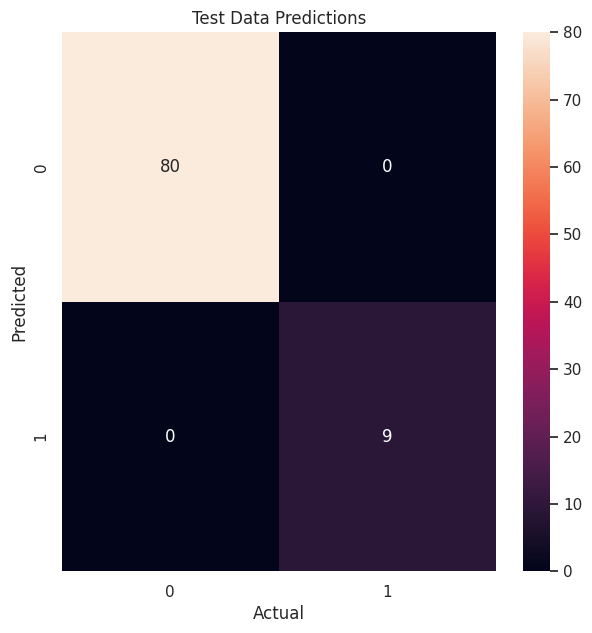

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00         9

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



In [28]:
def predict(model, X):
    pred = model.predict(X).flatten()
    pred[pred > 0.5] = 1
    pred[pred <= 0.5] = 0
    return pred

def plot_actual_vs_predicted(y_true,y_pred,title=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(7,7))
    sns.heatmap(cm, annot=True, fmt='g')

    #Labelling
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.show()
plot_actual_vs_predicted(y_test, y_pred1, 'Test Data Predictions')
print(classification_report(y_test, y_pred1))

In [29]:
classifier.save('cardiack risk prediction.h5')